# Solving Data Science problem using PYTHON on Predicting Healthcare Insurance Costs

This is data science project that combines healthcare insights and predictive analytics. Our task here is to predict customer healthcare costs using the power of machine learning. Our insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Our primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is our key to unlocking patterns in healthcare costs. Here's what we need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once our model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to our training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is our playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv("C:/Users/sachi/Downloads/insurance.csv")
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


### Task #1: Clean up the data
### - Are there any missing values? x
### - Standardize categories in region x
### - Standardize sex to just two categories x
### - Change smoker column to boolean x 
### - Standardize charges data type (float)

In [2]:
insurance_filled = insurance.dropna()
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB


In [3]:
# standardize categories into regions
insurance_filled['region'] = insurance_filled['region'].str.lower()
insurance_filled['region'].unique()

C:\Users\sachi\AppData\Local\Temp\ipykernel_18884\2605483358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['region'] = insurance_filled['region'].str.lower()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
# - Standardize sex to just two categories x
FEMALE = 'female'
MALE = 'male'
sex_map = {'F': FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
insurance_filled['sex'].unique()

C:\Users\sachi\AppData\Local\Temp\ipykernel_18884\2093501967.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)


array(['female', 'male'], dtype=object)

In [6]:
#- Change smoker column to boolean x 
insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')
insurance_filled['smoker'].unique()

C:\Users\sachi\AppData\Local\Temp\ipykernel_18884\3717151041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')


array([ True, False])

In [7]:
# - Standardize charges data type (float) 
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')

insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_pos.sample(10)

C:\Users\sachi\AppData\Local\Temp\ipykernel_18884\2750097744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')


,age,sex,bmi,children,smoker,region,charges
1165,35.0,female,26.125,0.0,False,northeast,5227.98875
98,56.0,male,19.950,0.0,True,northeast,22412.64850
583,32.0,female,23.650,1.0,False,southeast,17626.23951
1307,32.0,male,28.120,4.0,True,northwest,21472.47880
629,44.0,female,38.950,0.0,True,northwest,42983.45850
470,27.0,male,32.670,0.0,False,southeast,2497.03830
1006,28.0,male,29.260,2.0,False,northeast,4438.26340
1233,58.0,male,23.300,0.0,False,southwest,11345.51900
931,39.0,female,32.500,1.0,False,southwest,6238.29800
1238,37.0,male,22.705,3.0,False,northeast,6985.50695


# Task #2: Draw Scatterplots of relationships between variables & charges

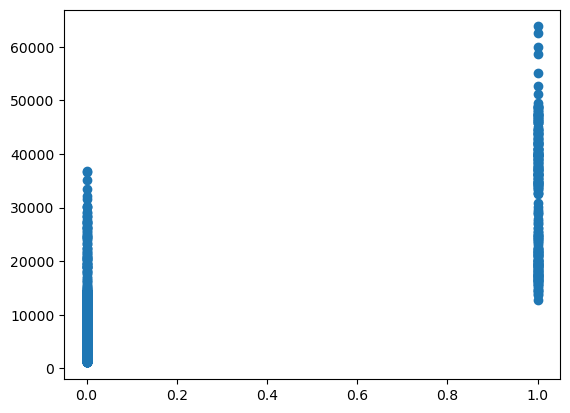

In [29]:
# Task #2: Scatterplots of relationships between variables & charges
import matplotlib.pyplot as plt

df = insurance_pos.copy()

# Observations
# Smokers generally incur higher insurance charges. In your sample, all smoker values are False, so this plot will only show non-smoker data.
# This indicates that for this subset, smoking is not influencing charges.

plt.scatter(df['smoker'], df['charges'])

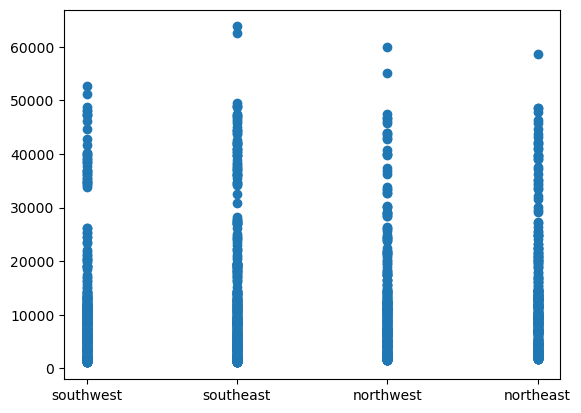

In [24]:
# Observations:
# Differences in charges may appear between regions. For example:
# The southeast region might show higher charges (e.g., row 842 with a charge of 36021.01).
# Other regions, like northwest and southwest, might show more moderate charges.
# If a specific region consistently has higher or lower charges, this might suggest geographic differences in insurance costs.
df = insurance_pos.copy()

plt.scatter(df['region'], df['charges'])

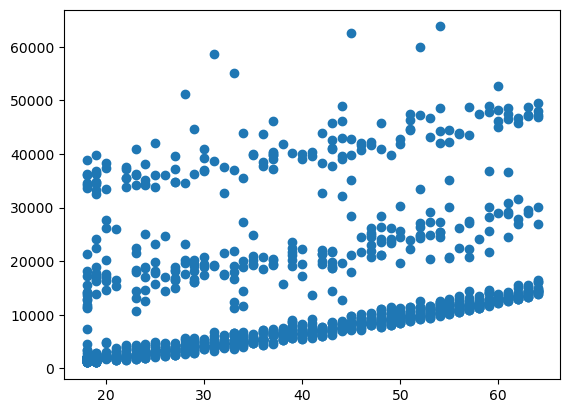

In [25]:
# Observations:
# Older individuals often have higher charges due to increased health risks. For example:
# At age 63 (row 1079), charges are 15161.53.
# However, age 19 (rows 1129 and 106) has significantly lower charges (e.g., 1728.90 and 2331.52).
# A positive correlation between age and charges is likely, but there could be exceptions influenced by other factors like smoker or bmi.
plt.scatter(df['age'], df['charges'])

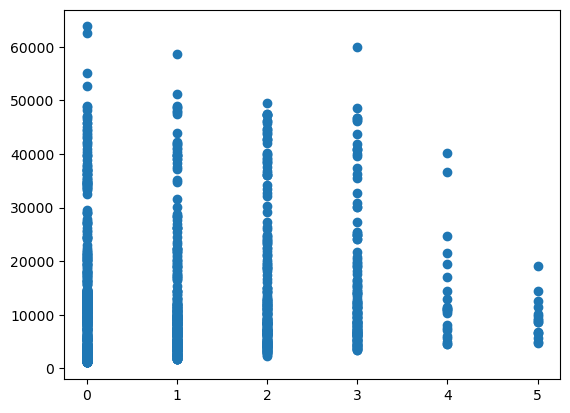

In [26]:
# Observations:
# There may not be a strong trend between children and charges. For example:
# Row 963 has 3 children but a moderate charge of 9500.57.
# Row 1054 has 0 children but a much lower charge of 3353.47.
# Charges might depend more on other factors like bmi, age, or smoker rather than children

plt.scatter(df['children'], df['charges'])

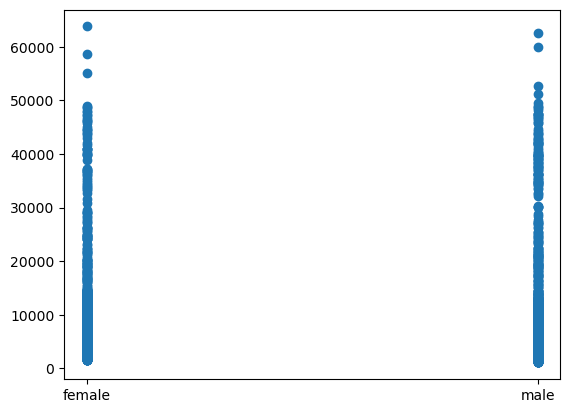

In [27]:
# Observations:
# The sample data does not suggest a clear trend of charges differing by sex.
# For example, male (row 244) has charges of 29523.17, while female (row 842) has even higher charges of 36021.01.
# Gender alone might not be a strong determinant of charges without considering other factors.

plt.scatter(df['sex'], df['charges'])

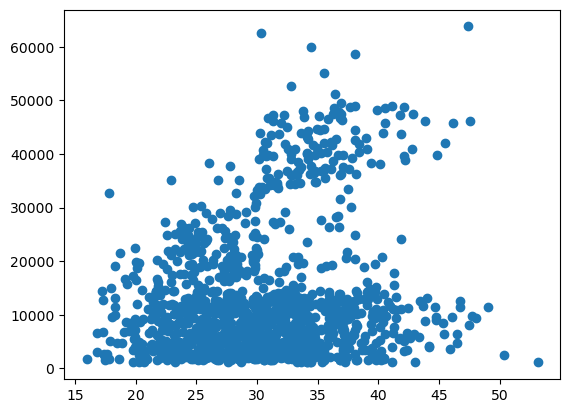

In [28]:
# Observations:
# Higher BMI values might be associated with higher charges, as obesity often correlates with increased health risks. For example:
# Row 1239 (BMI = 42.13) has a charge of 3238.43, which is relatively low for a high BMI. This might be because the individual is young (age 50) or not a smoker.
# Row 842 (BMI = 32.78) has extremely high charges (36021.01), possibly due to other factors such as age.
#A weak to moderate positive correlation is expected, especially when combined with factors like smoker.

plt.scatter(df['bmi'], df['charges'])

# Task #3 - Prepare the data for a model fitting

In [15]:
# To create a model we have to convert the variables into numericals for machine understanding
# firstly we are creating a dummy values of regions and evaluating the values of it and we got to know that region southeast has more than other regions values
# we are removing southeast region in next step because it appears most frequently
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
df_new = df_new.drop(columns=['region_southeast'])


In [17]:
df_new['smoker'] = df_new['smoker'].astype('int64')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1208 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1208 non-null   float64
 1   sex               1208 non-null   object 
 2   bmi               1208 non-null   float64
 3   children          1208 non-null   float64
 4   smoker            1208 non-null   int64  
 5   charges           1207 non-null   float64
 6   region_northeast  1208 non-null   bool   
 7   region_northwest  1208 non-null   bool   
 8   region_southwest  1208 non-null   bool   
dtypes: bool(3), float64(4), int64(1), object(1)
memory usage: 69.6+ KB


In [18]:
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns=['sex'])

In [19]:
df_new = df_new.dropna()
df_new.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,False,False,True,0
1,18.0,33.770,1.0,0,1725.55230,False,False,False,1
2,28.0,33.000,3.0,0,4449.46200,False,False,False,1
3,33.0,22.705,0.0,0,21984.47061,False,True,False,1
4,32.0,28.880,0.0,0,3866.85520,False,True,False,1


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score    

# Define input and output variables
X = df_new.drop(columns=['charges'])
y = df_new['charges']

print(df_new.info())
print(y.info())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R squared score
r2_score = r2_score(y_test, y_pred)

# Output the mean squared error
r2_score

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1207 non-null   float64
 1   bmi               1207 non-null   float64
 2   children          1207 non-null   float64
 3   smoker            1207 non-null   int64  
 4   charges           1207 non-null   float64
 5   region_northeast  1207 non-null   bool   
 6   region_northwest  1207 non-null   bool   
 7   region_southwest  1207 non-null   bool   
 8   is_male           1207 non-null   int64  
dtypes: bool(3), float64(4), int64(2)
memory usage: 69.5 KB
None
<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872816

In [21]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
    df_new = df_new.drop(columns=['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')
    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
    df_new = df_new.drop(columns=['sex'])
    
    return df_new

In [23]:
# Implement model creation and training here
# Use as many cells as you need

# Task #5, see how model performs on validation dataset
# Subtask - Create helper function to preprocess dataframe

val_df = pd.read_csv('C:/Users/sachi/Downloads/validation_dataset.csv')
input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
